In [1]:
import numpy as np
import mesa_reader as mr
import pandas as pd
import matplotlib.pyplot as plt
import smplotlib

from scipy.stats import linregress

## Data

In [2]:
h = mr.MesaData('/home/thiago/MESA_02/SolarModel_Diff_0.023/history.data')

data_diffusion = {
    
    'age': h.data('star_age'),
    'luminosity': 10**h.data('log_L'),
    'temperature': 10**h.data('log_Teff'),
    'mass': h.data('star_mass'),
    'radius': 10**h.data('log_R'),
    'logg': h.data('log_g'),
    'convective_core_mass': h.data('mass_conv_core'),
    'cz_bot_mass': h.data('cz_bot_mass'), 
    'cz_bot_radius': h.data('cz_bot_radius'),
    'log_surf_cell_z': h.data('log_surf_cell_z'),
    'v_div_csound_surf': h.data('v_div_csound_surf'),
    'central_P': h.data('log_cntr_P'), 
    'central_rho': h.data('log_cntr_Rho'),
    'central_T': h.data('log_cntr_T'),
    'central_mu': h.data('center_mu'),
    'surface_he4': h.data('surface_he4'),
    
}

data_diffusion = pd.DataFrame(data_diffusion)

s = mr.MesaData('/home/thiago/MESA_02/SolarModel_NoDiff_0.023/history.data')

data_no_diffusion = {
    
    'age': s.data('star_age'),
    'luminosity': 10**s.data('log_L'),
    'temperature': 10**s.data('log_Teff'),
    'mass': s.data('star_mass'),
    'radius': 10**s.data('log_R'),
    'logg': s.data('log_g'),
    'convective_core_mass': s.data('mass_conv_core'),
    'cz_bot_mass': s.data('cz_bot_mass'), 
    'cz_bot_radius': s.data('cz_bot_radius'),
    'log_surf_cell_z': s.data('log_surf_cell_z'),
    'v_div_csound_surf': s.data('v_div_csound_surf'),
    'central_P': s.data('log_cntr_P'), 
    'central_rho': s.data('log_cntr_Rho'),
    'central_T': s.data('log_cntr_T'),
    'central_mu': s.data('center_mu'),
    'surface_he4': s.data('surface_he4'),
    
}

data_no_diffusion = pd.DataFrame(data_no_diffusion)

In [3]:
data_diffusion = data_diffusion[2:]
data_no_diffusion = data_no_diffusion[2:]

In [4]:
data_diffusion.tail(1)

,age,luminosity,temperature,mass,radius,logg,convective_core_mass,cz_bot_mass,cz_bot_radius,log_surf_cell_z,v_div_csound_surf,central_P,central_rho,central_T,central_mu,surface_he4
11,4.570000e+09,1.0,5772.00385,1.0,1.0,4.438068,0.0,0.978419,0.722505,-1.769556,0.0,17.367908,2.177313,7.194267,0.845898,0.243855


In [5]:
data_no_diffusion.tail(1)

,age,luminosity,temperature,mass,radius,logg,convective_core_mass,cz_bot_mass,cz_bot_radius,log_surf_cell_z,v_div_csound_surf,central_P,central_rho,central_T,central_mu,surface_he4
10,4.570000e+09,1.000001,5772.004176,1.0,1.0,4.438067,0.0,0.982084,0.735016,-1.779441,0.0,17.361708,2.166269,7.187133,0.823091,0.260969


## 01

Construct two calibrated solar models, one with, and one without diffusion.

They should match the Sun's radius, luminosity, and surface metallicity (Z/X = 0.023)

__

(a) How much does the mixing length required to construct the models change?

(b) What is the value of the surface helium abundance in each case?

(c) What is the position of the base of the convection zone in each of the models?

(d) For each model, plot how the position of the base of the convection zone evolves with time.

In [6]:
# (b)

print(f'Y (diffusion): {data_diffusion.surface_he4.tail(1).values}\nY (no diffusion): {data_no_diffusion.surface_he4.tail(1).values}')
print(f'DeltaY: {data_no_diffusion.surface_he4.tail(1).values - data_diffusion.surface_he4.tail(1).values}')

Y (diffusion): [0.24385539]
Y (no diffusion): [0.26096903]
DeltaY: [0.01711364]


In [7]:
# (c1)

print(f'r/R (diffusion): {data_diffusion.cz_bot_radius.tail(1).values}\nr/R (no diffusion): {data_no_diffusion.cz_bot_radius.tail(1).values}')
print(f'Delta(r/R): {data_no_diffusion.cz_bot_radius.tail(1).values - data_diffusion.cz_bot_radius.tail(1).values}')

r/R (diffusion): [0.72250468]
r/R (no diffusion): [0.73501555]
Delta(r/R): [0.01251087]


In [8]:
# (c2)

print(f'm/M (diffusion): {data_diffusion.cz_bot_mass.tail(1).values}\nm/M (no diffusion): {data_no_diffusion.cz_bot_mass.tail(1).values}')
print(f'Delta(m/M): {data_no_diffusion.cz_bot_mass.tail(1).values - data_diffusion.cz_bot_mass.tail(1).values}')

m/M (diffusion): [0.97841865]
m/M (no diffusion): [0.98208381]
Delta(m/M): [0.00366516]


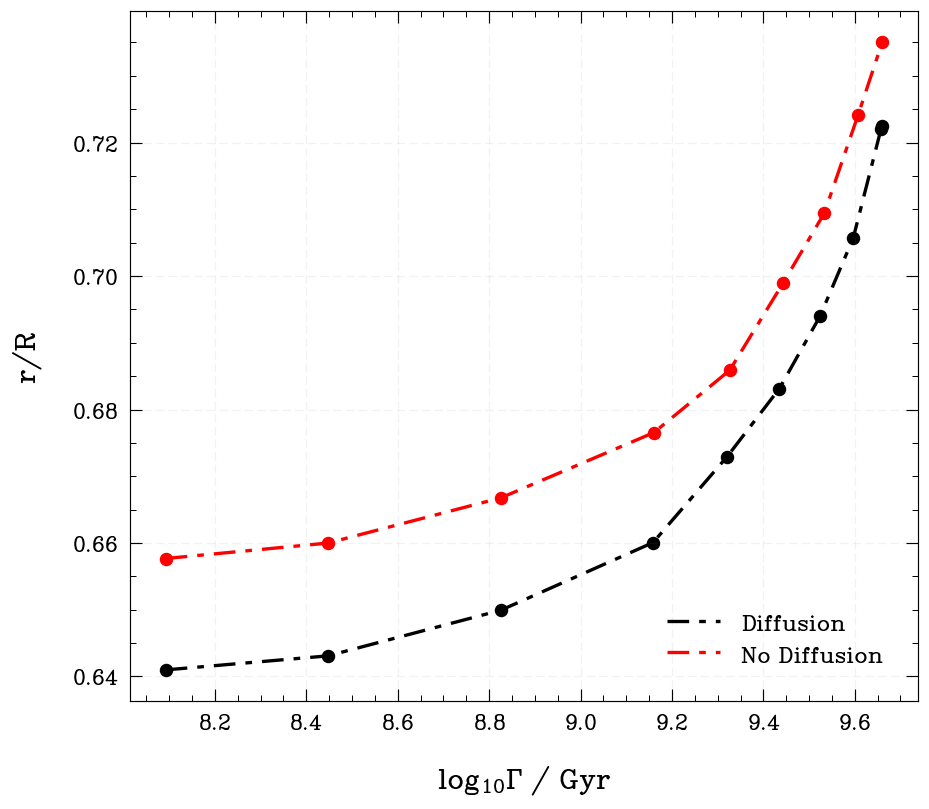

In [9]:
# (d1)

fig, ax = plt.subplots(figsize = (8, 7))
ax.grid(alpha = 0.1)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
ax.set_xlabel(r'$\log_{10}\Gamma$ / Gyr', fontsize = 20, labelpad = 18)
ax.set_ylabel('r/R', fontsize = 20, labelpad = 18)

ax.scatter(np.log10(data_diffusion.age), data_diffusion.cz_bot_radius, s = 50, color = 'black')
ax.plot(np.log10(data_diffusion.age).values, data_diffusion.cz_bot_radius.values, lw = 2, color = 'black', ls = 'dashdot', label = 'Diffusion')

ax.scatter(np.log10(data_no_diffusion.age), data_no_diffusion.cz_bot_radius, s = 50, color = 'red')
ax.plot(np.log10(data_no_diffusion.age).values, data_no_diffusion.cz_bot_radius.values, lw = 2, color = 'red', ls = 'dashdot', label = 'No Diffusion')

plt.legend(loc = 'lower right', fontsize = 16, edgecolor = 'white')
plt.tight_layout()
plt.savefig('r_R_Age.pdf')

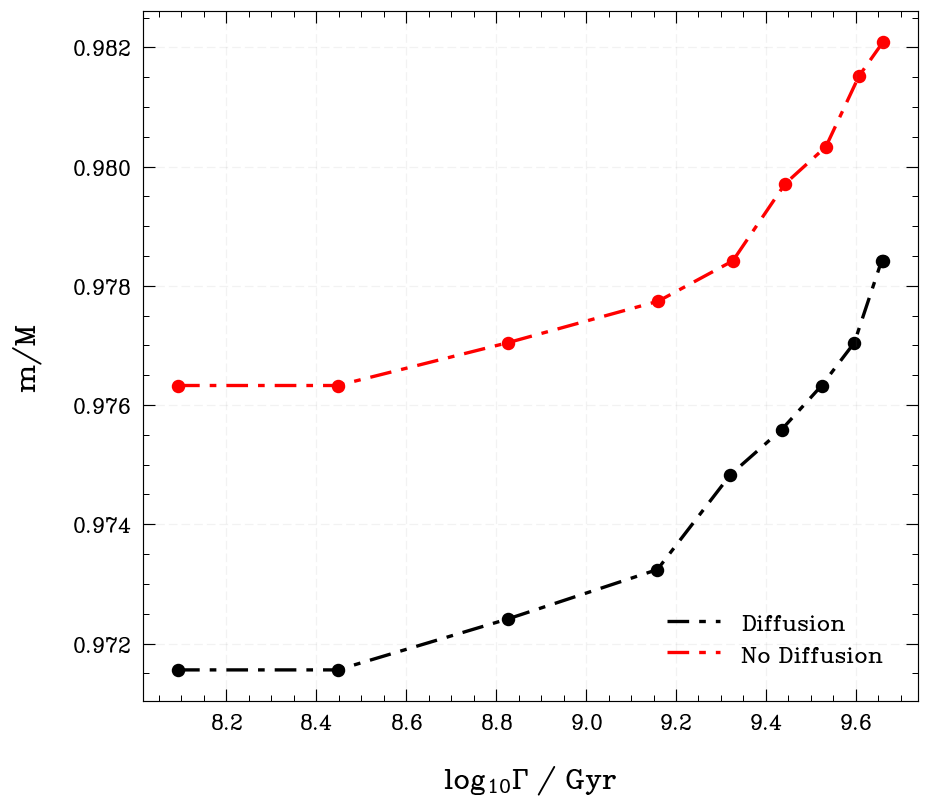

In [10]:
# (d2)

fig, ax = plt.subplots(figsize = (8, 7))
ax.grid(alpha = 0.1)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
ax.set_xlabel(r'$\log_{10}\Gamma$ / Gyr', fontsize = 20, labelpad = 18)
ax.set_ylabel('m/M', fontsize = 20, labelpad = 18)

ax.scatter(np.log10(data_diffusion.age), data_diffusion.cz_bot_mass, s = 50, color = 'black')
ax.plot(np.log10(data_diffusion.age).values, data_diffusion.cz_bot_mass.values, lw = 2, color = 'black', ls = 'dashdot', label = 'Diffusion')

ax.scatter(np.log10(data_no_diffusion.age), data_no_diffusion.cz_bot_mass, s = 50, color = 'red')
ax.plot(np.log10(data_no_diffusion.age).values, data_no_diffusion.cz_bot_mass.values, lw = 2, color = 'red', ls = 'dashdot', label = 'No Diffusion')

plt.legend(loc = 'lower right', fontsize = 16, edgecolor = 'white')
plt.tight_layout()
plt.savefig('m_M_Age.pdf')

# 02

Construct three more calibrated solar models with diffusion, this time with Z/X = 0.0165, Z/X = 0.018 and Z/X = 0.0245

__

(a) How does the position of the base of the convection zone change with change in metallicity? Use all four models with diffusion to demonstrate this. Find a rough relation between metallicity (Z/X at surface) and the CZ base.

(b) What is the surface helium abundance in each case? Find a rough relation between metallicity and surface Y.

(c) How do the mixing-length parameter and the initial helium abundance change in each case?

In [11]:
model0018 = mr.MesaData('/home/thiago/MESA_02/SolarModel_Diff_0.018/history.data')

model0018 = {
    
    'age': model0018.data('star_age'),
    'luminosity': 10**model0018.data('log_L'),
    'temperature': 10**model0018.data('log_Teff'),
    'mass': model0018.data('star_mass'),
    'radius': 10**model0018.data('log_R'),
    'logg': model0018.data('log_g'),
    'convective_core_mass': model0018.data('mass_conv_core'),
    'cz_bot_mass': model0018.data('cz_bot_mass'), 
    'cz_bot_radius': model0018.data('cz_bot_radius'),
    'log_surf_cell_z': model0018.data('log_surf_cell_z'),
    'v_div_csound_surf': model0018.data('v_div_csound_surf'),
    'central_P': model0018.data('log_cntr_P'), 
    'central_rho': model0018.data('log_cntr_Rho'),
    'central_T': model0018.data('log_cntr_T'),
    'central_mu': model0018.data('center_mu'),
    'surface_he4': model0018.data('surface_he4'),
    
}

model0018 = pd.DataFrame(model0018)

#

model00165 = mr.MesaData('/home/thiago/MESA_02/SolarModel_Diff_0.0165/history.data')

model00165 = {
    
    'age': model00165.data('star_age'),
    'luminosity': 10**model00165.data('log_L'),
    'temperature': 10**model00165.data('log_Teff'),
    'mass': model00165.data('star_mass'),
    'radius': 10**model00165.data('log_R'),
    'logg': model00165.data('log_g'),
    'convective_core_mass': model00165.data('mass_conv_core'),
    'cz_bot_mass': model00165.data('cz_bot_mass'), 
    'cz_bot_radius': model00165.data('cz_bot_radius'),
    'log_surf_cell_z': model00165.data('log_surf_cell_z'),
    'v_div_csound_surf': model00165.data('v_div_csound_surf'),
    'central_P': model00165.data('log_cntr_P'), 
    'central_rho': model00165.data('log_cntr_Rho'),
    'central_T': model00165.data('log_cntr_T'),
    'central_mu': model00165.data('center_mu'),
    'surface_he4': model00165.data('surface_he4'),
    
}

model00165 = pd.DataFrame(model00165)

#

# (a)

model00245 = mr.MesaData('/home/thiago/MESA_02/SolarModel_Diff_0.0245/history.data')

model00245 = {
    
    'age': model00245.data('star_age'),
    'luminosity': 10**model00245.data('log_L'),
    'temperature': 10**model00245.data('log_Teff'),
    'mass': model00245.data('star_mass'),
    'radius': 10**model00245.data('log_R'),
    'logg': model00245.data('log_g'),
    'convective_core_mass': model00245.data('mass_conv_core'),
    'cz_bot_mass': model00245.data('cz_bot_mass'), 
    'cz_bot_radius': model00245.data('cz_bot_radius'),
    'log_surf_cell_z': model00245.data('log_surf_cell_z'),
    'v_div_csound_surf': model00245.data('v_div_csound_surf'),
    'central_P': model00245.data('log_cntr_P'), 
    'central_rho': model00245.data('log_cntr_Rho'),
    'central_T': model00245.data('log_cntr_T'),
    'central_mu': model00245.data('center_mu'),
    'surface_he4': model00245.data('surface_he4'),
    
}

model00245 = pd.DataFrame(model00245)

In [12]:
# (a1)

print(r'(m/M)_{\rm Z/X = 0.0165} &=& %.3f\notag \\'%(float(model00165.cz_bot_mass.tail(1).values)))
print(r'(m/M)_{\rm Z/X = 0.0180} &=& %.3f\notag \\'%(float(model0018.cz_bot_mass.tail(1).values)))
print(r'(m/M)_{\rm Z/X = 0.0230} &=& %.3f\notag \\'%(float(data_diffusion.cz_bot_mass.tail(1).values)))
print(r'(m/M)_{\rm Z/X = 0.0245} &=& %.3f\notag \\'%(float(model00245.cz_bot_mass.tail(1).values)))

(m/M)_{\rm Z/X = 0.0165} &=& 0.982\notag \\
(m/M)_{\rm Z/X = 0.0180} &=& 0.982\notag \\
(m/M)_{\rm Z/X = 0.0230} &=& 0.978\notag \\
(m/M)_{\rm Z/X = 0.0245} &=& 0.978\notag \\


In [13]:
# (a2)

print(r'(r/R)_{\rm Z/X = 0.0165} &=& %.3f\notag \\'%(float(model00165.cz_bot_radius.tail(1).values)))
print(r'(r/R)_{\rm Z/X = 0.0180} &=& %.3f\notag \\'%(float(model0018.cz_bot_radius.tail(1).values)))
print(r'(r/R)_{\rm Z/X = 0.0230} &=& %.3f\notag \\'%(float(data_diffusion.cz_bot_radius.tail(1).values)))
print(r'(r/R)_{\rm Z/X = 0.0245} &=& %.3f\notag \\'%(float(model00245.cz_bot_radius.tail(1).values)))

(r/R)_{\rm Z/X = 0.0165} &=& 0.733\notag \\
(r/R)_{\rm Z/X = 0.0180} &=& 0.732\notag \\
(r/R)_{\rm Z/X = 0.0230} &=& 0.723\notag \\
(r/R)_{\rm Z/X = 0.0245} &=& 0.721\notag \\


In [14]:
# (b1)

print(r'Y_{\rm Z/X = 0.0165} &=& %.3f\notag \\'%(float(model00165.surface_he4.tail(1).values)))
print(r'Y_{\rm Z/X = 0.0180} &=& %.3f\notag \\'%(float(model0018.surface_he4.tail(1).values)))
print(r'Y_{\rm Z/X = 0.0230} &=& %.3f\notag \\'%(float(data_diffusion.surface_he4.tail(1).values)))
print(r'Y_{\rm Z/X = 0.0245} &=& %.3f\notag \\'%(float(model00245.surface_he4.tail(1).values)))

Y_{\rm Z/X = 0.0165} &=& 0.218\notag \\
Y_{\rm Z/X = 0.0180} &=& 0.223\notag \\
Y_{\rm Z/X = 0.0230} &=& 0.244\notag \\
Y_{\rm Z/X = 0.0245} &=& 0.248\notag \\


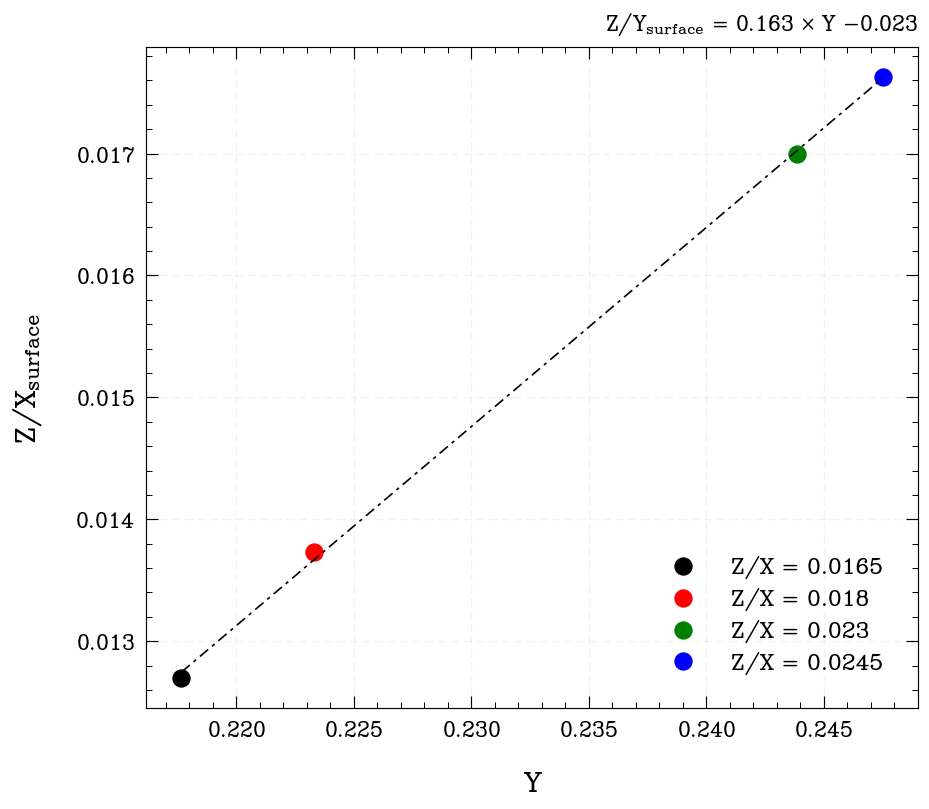

In [15]:
x_values = [
    model00165.surface_he4.tail(1).values[0],
    model0018.surface_he4.tail(1).values[0],
    data_diffusion.surface_he4.tail(1).values[0],
    model00245.surface_he4.tail(1).values[0]]

y_values = [
    10**model00165.log_surf_cell_z.tail(1).values[0],
    10**model0018.log_surf_cell_z.tail(1).values[0],
    10**data_diffusion.log_surf_cell_z.tail(1).values[0],
    10**model00245.log_surf_cell_z.tail(1).values[0]]

x_data = np.linspace(x_values[0], x_values[-1], 1000)

data = pd.DataFrame({'X': x_values, 'Y': y_values})

slope, intercept, r_value, p_value, std_err = linregress(data['X'], data['Y'])
regression_line = slope * np.array(x_data) + intercept

fig, ax = plt.subplots(figsize = (8, 7))
ax.grid(alpha = 0.1)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
ax.set_title(r'Z/Y$_{\rm surface}$ = %.3f $\times$ Y %.3f'%(slope, intercept), fontsize = 15, loc = 'right')
ax.set_ylabel(r'Z/X$_{\rm surface}$', fontsize = 20, labelpad = 18)
ax.set_xlabel('Y', fontsize = 20, labelpad = 18)

ax.scatter(model00165.surface_he4.tail(1).values, 10**model00165.log_surf_cell_z.tail(1).values, s = 100, color = 'black', label = 'Z/X = 0.0165')
ax.scatter(model0018.surface_he4.tail(1).values, 10**model0018.log_surf_cell_z.tail(1).values, s = 100, color = 'red', label = 'Z/X = 0.018')
ax.scatter(data_diffusion.surface_he4.tail(1).values, 10**data_diffusion.log_surf_cell_z.tail(1).values, s = 100, color = 'green', label = 'Z/X = 0.023')
ax.scatter(model00245.surface_he4.tail(1).values, 10**model00245.log_surf_cell_z.tail(1).values, s = 100, color = 'blue', label = 'Z/X = 0.0245')

ax.plot(x_data, regression_line, color = 'black', lw = 1.0, ls = 'dashdot')

plt.legend(loc = 'lower right', fontsize = 16, edgecolor = 'white')
plt.tight_layout()
plt.savefig('ZoverX_Y.pdf')